### Need of web scraping :

scraping means extracting data from various websites.
one example : mysmartprice

use cases :
* ecommerce portals
* market research
* travel websites
* social websites : people scrap business profiles from social media and track their online presence
* to get data for any analysing purpose as well

There are many ways to extract information from websites :
* using API of the site
* web scraping
* just copy and paste
* etc.

### Legality : is it legal?

May be ! <br>
Scraping is fine until you are not causing any damage to the target website and you are doing it responsibly.

##### LinkedIn Case - 2014
* suing a group in California
* it uses a series of bot and fake profiles on the site to scrape content from other member profiles

 ### What exactly is web scraping?
 

It is a technique used to extract large amounts of data from websites and save it to a local file in computer or to a database. Instead of manually copying and pasting information, web scraping basically automates the process and does it in fraction of seconds

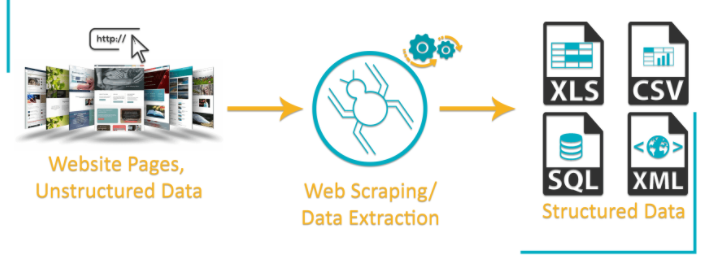

Basic steps :


* Document load
* parsing
* extraction
* transformation

### Packages used for webscraping :

In [14]:
"the good thing about Python is it has libraries for everything and string manipulation is very easy in Python"

'the good thing about Python is it has libraries for everything and string manipulation is very easy in Python'

* Beautiful Soup
* Requests
* Pattern
* Scrapy
* Mechanize

*Beautiful soup : Python library for pulling data out of HTML and XML files.
*Requests: Receiving and sending information over HTTP

### Demo Exercise : Flipkart

__Problem statement__ : <br>
Scrape flipkart website and fetch details like : name of the product, price and the ratings of the searched product

In [3]:
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq # this function imports all the dependencies

my_url = 'https://www.flipkart.com/search?q=iphone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'
uClient = uReq(my_url) # opens up the connection and grabs the webpage
page_html = uClient.read() 
uClient.close()
page_soup = soup(page_html,"html.parser")

containers = page_soup.findAll("div",{"class":"_4ddWXP"})
print(len(containers))


40


In [10]:
#print(soup.prettify(containers[0]))
# HTML of the first item

In [8]:
container = containers[0]
print(container.div.img['alt'])
# see where item name is in the HTML code (under which div class, attribute name, etc.)

Apple iPhone 11 (White, 64 GB)


In [11]:
# price
price = container.findAll("div",{"class":"_25b18c"})
print(price[0].text)


₹48,999₹54,90010% off


In [13]:
# rating
ratings = container.findAll("div",{"class":"gUuXy- _2D5lwg"})
print(rating[0].text)

4.6(31,828)


In [15]:
# create a file
filename = "products.csv"
f=open(filename,"w")
headers = "Product_Name,Pricing,Ratings\n"
f.write(headers)

for container in containers:
    product_name = container.div.img["alt"]
    price_container = container.findAll("div",{"class":"_25b18c"})
    price = price_container[0].text.strip()
    
    rating_container = container.findAll("div",{"class":"gUuXy- _2D5lwg"})
    rating = rating_container[0].text
    
    print("product_name : "+product_name)
    print("price:"+price)
    print("ratings:"+rating)
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    

product_name : Apple iPhone 11 (White, 64 GB)
price:₹48,999₹54,90010% off
ratings:4.6(31,828)
product_name : Apple iPhone 11 (Purple, 64 GB)
price:₹48,999₹54,90010% off
ratings:4.6(31,828)
product_name : Apple iPhone 11 (Green, 64 GB)
price:₹48,999₹54,90010% off
ratings:4.6(31,828)


TypeError: 'NoneType' object is not subscriptable

pip install requests <br>
pip install html5lib <br>
pip install bs4

Fetching the HTML content : <br>
* we will use python requests module to fetch the HMTL as a string
* the next step then will be to parse the HTML content and give it a tree like structure so that it can be traversed

Parse the HTML
* once the HTML is fetched using the requests module as a string, it has to be converted into a form where we can search effectively
* For parsing, we will use python's BeautifulSoup library

HTML Tree Traversal
* Once the HTML is fetched parsed the next step is to manipulate the the tree using BeautifulSoup's functions.

In [17]:
# get the html
import requests
from bs4 import BeautifulSoup
url = "https://codewithharry.com"
r = requests.get(url)
htmlcontent = r.content
#print(htmlcontent)

In [21]:
# parse the html
soup = BeautifulSoup(htmlcontent,'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <!-- Required meta tags -->
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
  <meta content="Code With Harry is my attempt to teach basics and those coding techniques to people in short time which took me ages to learn. At Code With Harry, I provide a quick and to the point demo along with resources of anything and everything I teach. Source code and other resources are hosted on my website CodeWithHarry.com. I provide source code(if any) in the description of every video.
" name="description"/>
  <title>
   Free Programming Videos, Courses &amp; More In Hindi - Code With Harry
  </title>
  <!-- Bootstrap CSS -->
  <link crossorigin="anonymous" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" rel="stylesheet"/>
  <link href="/static/home/css/index.css" rel="styles

In [24]:
# html tree traversal
title = soup.title
print(title)
print(type(title))
print(type(title.string))

<title>Free Programming Videos, Courses &amp; More In Hindi - Code With Harry</title>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>
